<div class="alert alert-block alert-info">
<b>0. Введение</b>  

</div>

<div class="alert alert-block alert-info">
Для анализа проекта были использованы данные Churn. 
    
Данные клиента за предыдущий до проверки факта оттока месяц:  
    
'gender' — пол;  
    
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
    
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
    
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
    
'Phone' — наличие контактного телефона;  
    
'Age' — возраст;  
    
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).  
 
 Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  
    
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
    
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
    
'Group_visits' — факт посещения групповых занятий;  
    
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
    
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
    
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  

После проведения анализа будет подготовлен план действий по удержанию клиентов 
    

<div class="alert alert-block alert-info">
<b>1. Чтение и обзор датафреймов</b>
</div>

In [1]:
#добавление библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<div class="alert alert-block alert-info">
<b>2. Исследовательский анализ данных (EDA)</b>
</div>

In [2]:
#чтение датафрейма
churn = pd.read_csv('gym_churn.csv')

def check_dataset(dataset):
    try:
            print('\033[1m','Случайные 5 строк таблицы:','\033[0m')
            display(dataset.sample(5))
            print('\033[1m','Информация о типах данных:\n', '\033[0m')
            dataset.info()
            print('\033[1m','\nРазмер датасета:\n', '\033[0m')
            display(dataset.shape)
            print('\033[1m', 'Доля пропусков в столбцах:\n', '\033[0m')
            display(dataset.isna().sum())
            print('\033[1m', '\nКоличество дубликатов:', '\033[0m'), 
            display(dataset.duplicated().sum()) 
            print('\033[1m', '\nПроверка о состоянии данных. Метод describe():', '\033[0m'), 
            display(dataset.describe())
    except:
            print('Ошибка')

check_dataset(churn)

 Случайные 5 строк таблицы: 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3764,0,1,1,1,1,1,0,31,40.987163,1.0,9,1.791114,1.841029,0
2835,1,1,1,1,1,12,1,22,155.099738,10.0,4,4.141085,4.165957,0
3341,0,1,1,1,0,12,0,32,243.353497,12.0,10,2.882118,2.924054,0
2375,1,1,1,1,1,1,1,34,396.399451,1.0,1,2.237812,2.157835,0
1460,0,1,1,1,1,1,0,28,17.620551,1.0,1,1.473901,0.745164,1


 Информация о типах данных:
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total 

(4000, 14)

 Доля пропусков в столбцах:
 


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

 
Количество дубликатов: 


0

 
Проверка о состоянии данных. Метод describe(): 


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


<div class="alert alert-block alert-info">
Датасет представляет собой размер 400x14. 
    
Пропусков и дубликатов нет.  
Выбросов в признаках не наблюдается.    
</div>

In [3]:
#Создадим И проанализируем две группы: 0 - те, кто ушел в отток, 0 - те, кто остался

average_by_groups = churn.groupby(['Churn']).mean()
display(average_by_groups)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


<div class="alert alert-block alert-info">
Чаще всего отток происходит у клиентов:  
    
- кто дальше находится от фитнес-центра  
    
- кто не явлется партнером клуба  
    
- кто не приходил по акции "приведи друга"  
    
- у кого не продолжительный период контракта менше 3 мес  
    
- кто не посещал групповые занятия 
- у кого остается мало месяцев до конца контракта  
- вновь прибывшие клиенты  
- кто реже посещает занятия до 2 раз в неделю
    
Не влияет на отток:  
    
- пол  
- наличие контактного телефона  
- возраст  
- среднии траты на доп. услуги  
    
</div>

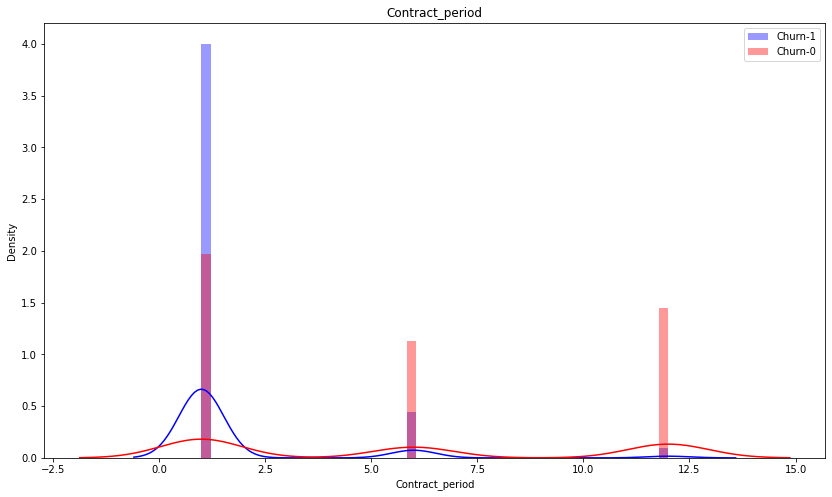

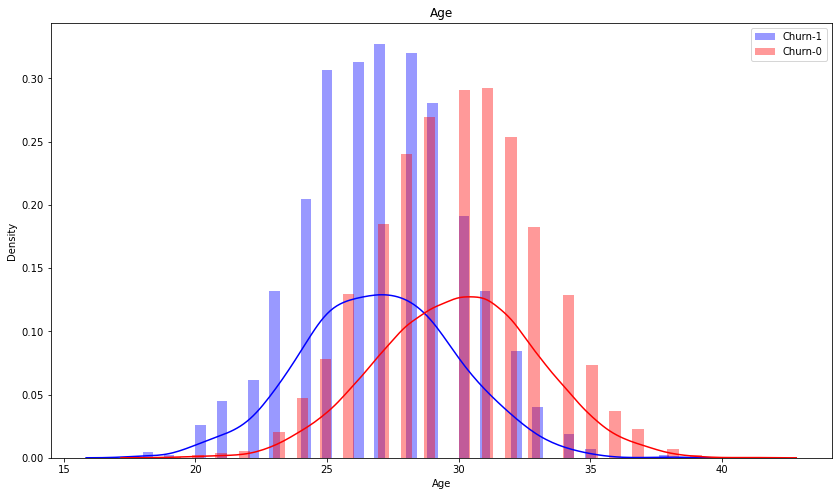

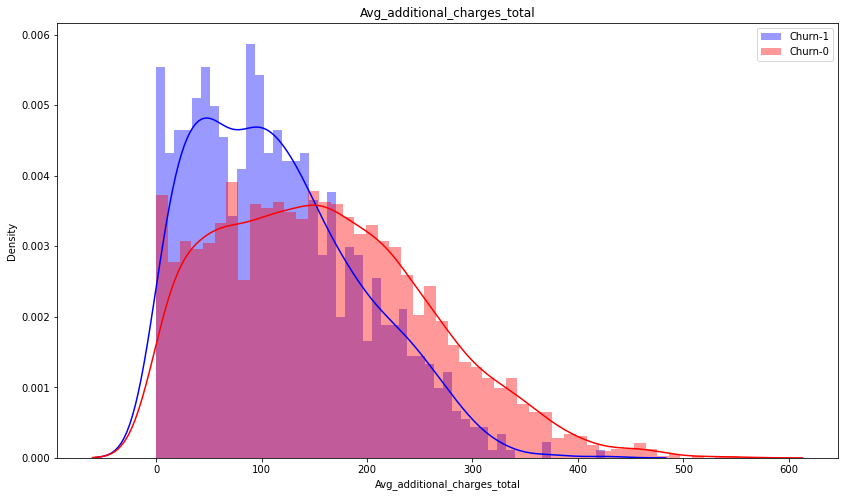

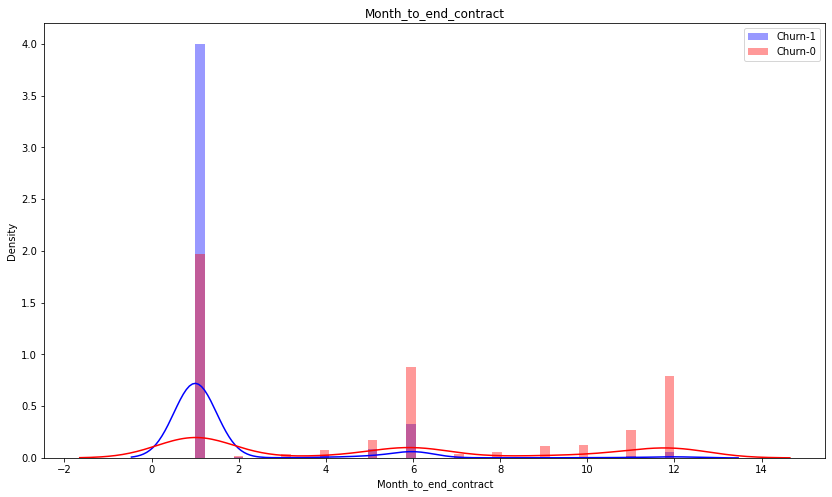

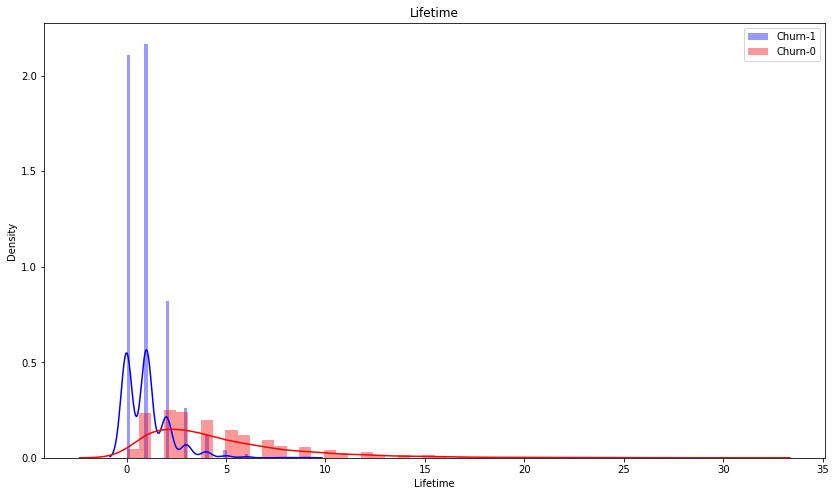

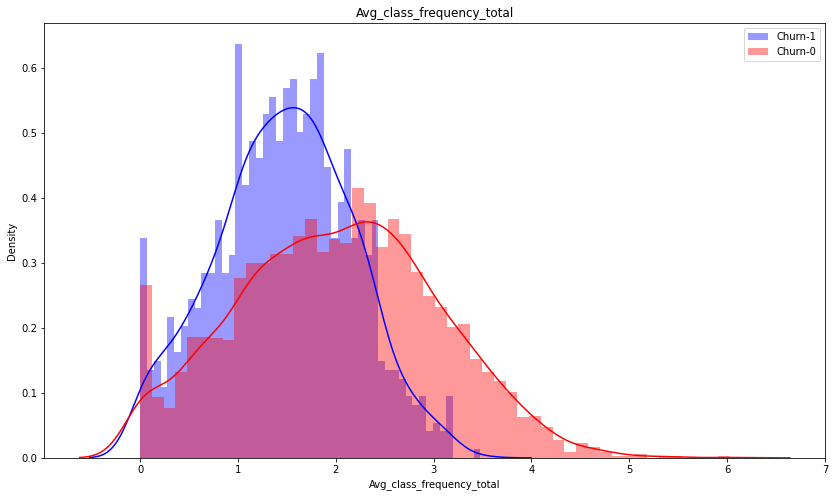

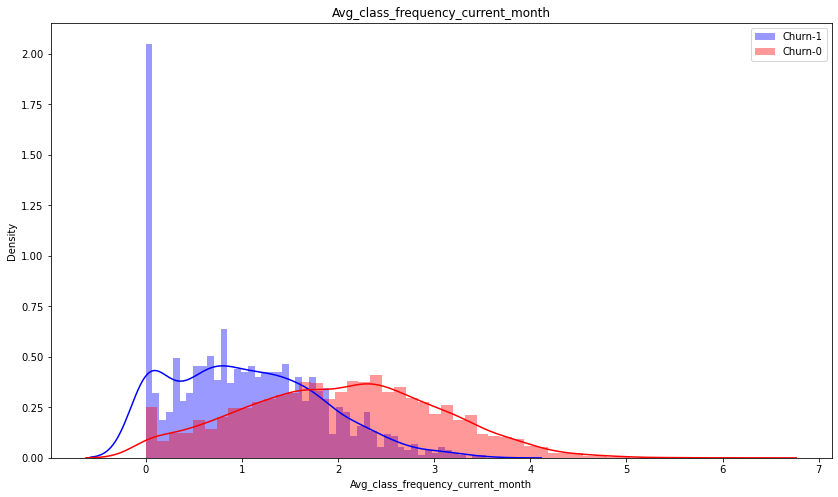

In [4]:
#Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

#list_feature = list(churn.columns)
#list_feature.remove('Churn')

list_feature_numeric = np.array(['Contract_period', 'Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month'])


for col in list_feature_numeric:
    plt.figure(figsize=(14,8))
    sns.distplot(churn.query('Churn == 1')[col], bins=50, color='blue', label = 'Churn-1') 
    sns.distplot(churn.query('Churn == 0')[col], bins=50, color='red', label = 'Churn-0') 
    plt.xlabel(col)
    plt.legend()
    plt.ylabel("Density")  
    plt.title(col)
    plt.show()



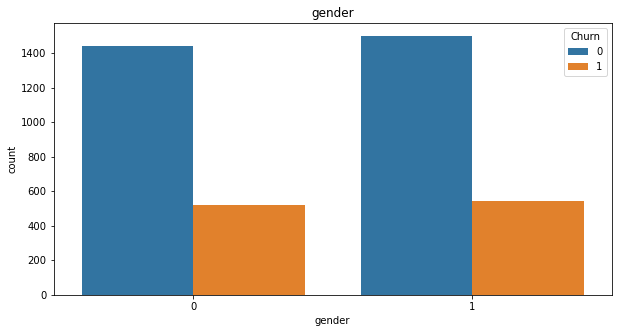

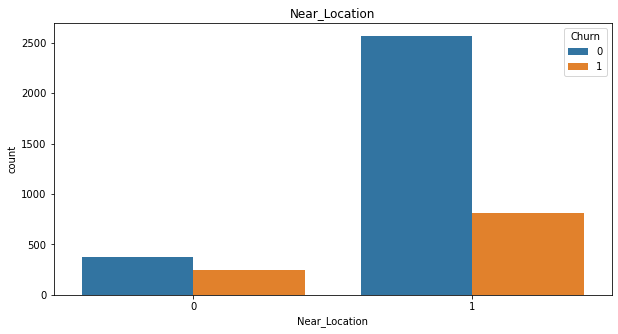

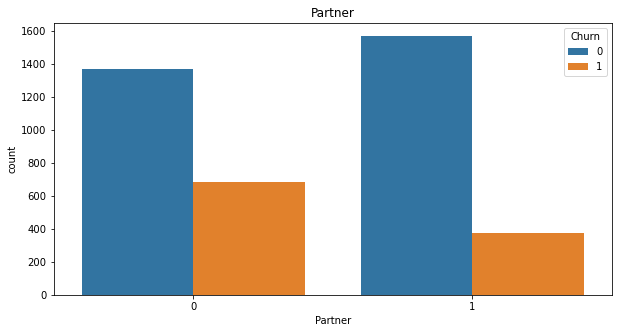

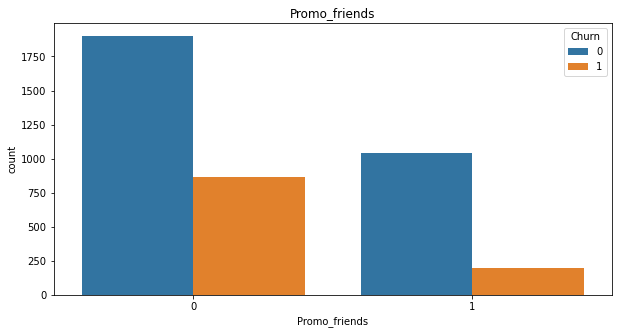

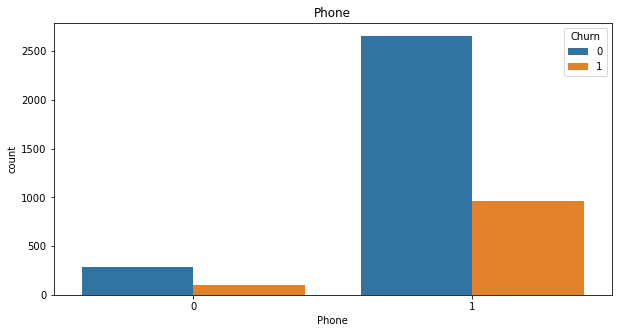

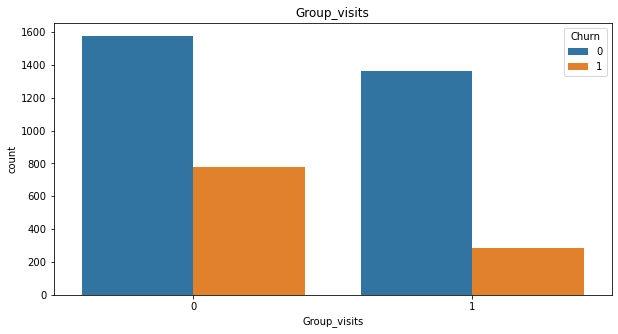

In [5]:
list_feature_bool = np.array(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits'])

for col in list_feature_bool:
    plt.figure(figsize=(10,5))
    sns.countplot(churn[col], hue=churn['Churn']) 
    plt.xlabel(col)
    plt.ylabel("count")  
    plt.title(col)
    plt.show()

<div class="alert alert-block alert-info">
Partner. К оттоку склоны клиенты пришедшие не по партнерской программе  
    
Promo_friends. К оттоку склоны клиенты не из категории «Приведи друга»  
    
Contract_period. К оттоку склоны клиенты с коротким периодом контракта  
    
Group_visits. К оттоку склоны клиенты, которые не занимаются в группах  
    
Age. К оттоку склоны клиенты в возраст 25-28 лет  
    
Avg_additional_charges_total. К оттоку склоны клиенты, которые реже совершают доп. услуги  
    
Month_to_end_contract. К оттоку склоны клиенты, у которых скоро закончится контракт  
    
Lifetime. К оттоку склоны клиенты, которые занимаются первые 2 месяца  
    
Avg_class_frequency_total. К оттоку склоны клиенты, которые посещают занятия 1-2 раза в неделю  
    
Avg_class_frequency_current_month. К оттоку склоны клиенты, которые посещают занятия до 1 раза в месяц

    
</div>

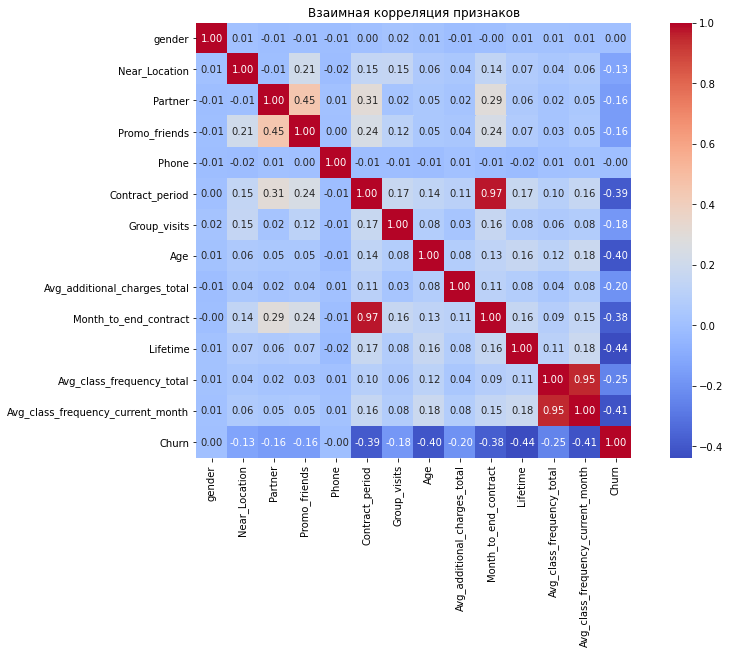

In [6]:
#Постройте матрицу корреляций и отобразите её

cm = churn.corr()   
plt.figure(figsize=(14,8))
plt.title('Взаимная корреляция признаков')
sns.heatmap(cm, annot = True, square=True, fmt='.2f', cmap ='coolwarm')
plt.show()

<div class="alert alert-block alert-info">
Корреляция ближе к 1 есть у следующих признаков:
Contract_period - Month_to_end_contract
Avg_class_frequency_current_month - Avg_class_frequency_current_total.
Удивительно здесь ничего нет, так как эти параметры пересекаются в своих показателях и носят одинаковую характеристику.  
Между целевой переменной Churn и Avg_class_frequency_current_total, Lifetime, Age существует обратная корреляция.
    
</div>

<div class="alert alert-block alert-info">
<b>3. Построение модели прогнозирования оттока клиентов</b>
</div>

In [7]:
#Разобъем данные на обучающую и валидационную выборку функцией train_test_split()

#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = churn.drop('Churn', axis=1)
y = churn['Churn']


#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Логистическая регрессия
lr_model = LogisticRegression(random_state=0) 
lr_model.fit(X_train,y_train)
lr_predict = lr_model.predict(X_test)
lr_prob = lr_model.predict_proba(X_test)[0:,1] 

#Случайный лес
rf_model =  RandomForestClassifier(n_estimators = 100, random_state=0)
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[0:,1]

In [8]:
#Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. 
#Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

print_all_metrics(
    y_test,
    lr_predict,
    lr_prob,
    title='Метрики для модели логистической регрессии:',
)
 
print_all_metrics(
    y_test,
    rf_predict,
    rf_prob,
    title='Метрики для модели случайного леса:',
)

Метрики для модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.84
	Recall: 0.80
	F1: 0.82
	ROC_AUC: 0.96
Метрики для модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


<div class="alert alert-block alert-info">
Все метрики (1)модели логистической регрессии показали себя лучше, чем (2)модели случайного леса.  
    
Модель логистической регрессии более приближена к реальной модели  
    
Доля правильных ответов (Accuracy) в 1ой модели выше на 1%.  
    
Точность (Precision) в 1ой модели выше на 1%, т.е доля правильных ответов по оттоку выше.  
    
Полнота (Reccal) в 1ой модели выше на 3%. C помощью 1ой модели удается чаще обнаружить вероятность оттока.  
    
И оценивая сводную метрику (F1), которая оценивает баланс между Precision и Recall, также выше на 3%.   
    
Метрика roc-auc в обоих моделяъ 0.97, этот результат достаточно близок к 1, что показывает высокую вероятность неслучайных ответов. 
 
</div>

<div class="alert alert-block alert-info">
<b>4. Кластеризация клиентов</b>
</div>

In [9]:
#Стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)


In [ ]:
#Построем матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 
#На основании полученного графика предположим, какое количество кластеров можно выделить.

linked = linkage(x_sc, method = 'ward')
plt.figure(figsize=(15,10))
plt.axhline(y=58, color='r', linestyle='-')
dendrogram(linked, orientation = 'top')
plt.title('Иерархическая кластеризация признаков по Оттоку клиентов')
plt.show()


<div class="alert alert-block alert-info">
Предположим 6 кластеров для всей группы признаков 
 
</div>

In [ ]:
#Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. 
#Договоримся за число кластеров принять n=5

km = KMeans(n_clusters = 5, random_state= 0) # задаём число кластеров, равное 5
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров 

churn['cluster_km'] = labels # сохраняем метки кластера в поле нашего датасета


#Посмотрим на средние значения признаков для кластеров.

churn.groupby(['cluster_km']).mean() # выводим статистику по средним значениям наших признаков по кластеру


<div class="alert alert-block alert-info">
Наиболее высокий показатель оттока в кластере 0.514, самый низкий уровень в кластере 0.028  
    
Такие признаки как  
    
-отдаленность от фитнес центра,  
-короткий контракт,  
-не групповые занятия,  
-низкая посещаемость  

влияют на высокий отток
    

 
</div>

In [ ]:
#Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

print('Графики для оттока')

Churn1 = churn.query('Churn == 1')

for col in list_feature_numeric:
    plt.figure(figsize=(14,8))
    sns.distplot(Churn1.query('cluster_km == 0')[col], bins=50, color='blue', label = 'кластер 1', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn1.query('cluster_km == 1')[col], bins=50, color='red', label = 'кластер 2', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn1.query('cluster_km == 2')[col], bins=50, color='yellow', label = 'кластер 3', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn1.query('cluster_km == 3')[col], bins=50, color='green', label = 'кластер 4', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn1.query('cluster_km == 4')[col], bins=50, color='black', label = 'кластер 5', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    plt.xlabel(col)
    plt.legend()
    plt.ylabel("плотность")  
    plt.title(col)
    plt.show()


In [ ]:
for col in list_feature_bool:
    plt.figure(figsize=(10,5))
    sns.countplot(Churn1[col], hue=Churn1['cluster_km']) 
    plt.xlabel(col)
    plt.ylabel("count")  
    plt.title(col)
    plt.show()

In [ ]:
#Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

print('Графики для оставшихся')

Churn0 = churn.query('Churn == 0')

for col in list_feature_numeric:
    plt.figure(figsize=(14,8))
    sns.distplot(Churn0.query('cluster_km == 0')[col], bins=50, color='blue', label = 'кластер 1', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn0.query('cluster_km == 1')[col], bins=50, color='red', label = 'кластер 2', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn0.query('cluster_km == 2')[col], bins=50, color='yellow', label = 'кластер 3', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn0.query('cluster_km == 3')[col], bins=50, color='green', label = 'кластер 4', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    sns.distplot(Churn0.query('cluster_km == 4')[col], bins=50, color='black', label = 'кластер 5', kde=True, kde_kws={'linewidth': 4}, hist = False) 
    plt.xlabel(col)
    plt.legend()
    plt.ylabel("плотность")  
    plt.title(col)
    plt.show()


In [ ]:
for col in list_feature_bool:
    plt.figure(figsize=(10,5))
    sns.countplot(Churn0[col], hue=Churn0['cluster_km']) 
    plt.xlabel(col)
    plt.ylabel("count")  
    plt.title(col)
    plt.show()

<div class="alert alert-block alert-info">
Сложно выделить кластер, на котором стоит фокусироваться
 
</div>

In [ ]:
#Для каждого полученного кластера посчитаем долю оттока (методом groupby()).
#Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

churn_rate = (churn.query('Churn==1').groupby('cluster_km')['Churn'].count() / churn.groupby('cluster_km')['Churn'].count()).round(3)

display(churn_rate)

<div class="alert alert-block alert-info">
Наиболее надежный 1й кластер 0.028. 
Самый ненадежный 4й кластер 0.514.
 
</div>

<div class="alert alert-block alert-info">
<b>5. Выводы и базовые рекомендации по работе с клиентами</b>
</div>

<div class="alert alert-block alert-info">
Разберем метрики, которые положительно влияют на удержание клиента  
    
1. Близость до фитнес-центра(ФЦ). Стоит настраивать таргетную рекламу по радиусу нахождения ФЦ. Размещать наружную рекламу вблизи центра.  
    
2. Привлечение партнеров, программа "приведи друга", создание групповых занятий являтеся удерживающим фактором. Люди охотнее посещают занятия, если у них если друг или спортивное комьюнити.   

3. Клиенты в возрасте 29-32 более лояльны, чем клиенты 25-28. Настраивание таргетной рекламы на точную возрастную аудиторию.

4. Вовлчение клиентов в использование других фитнес-услуг, также положительно влияет на удержание. Стоит делать различные промо и розыгрыши на доп. услуги  

5. Стоит подписывать максимально длинные контракты на абонементы. 6 и 12 месяцев являются оптимальными. Также клиенту необходимо заранее напоминать продлить контракт. Так как есть вероятность, что клиенты могут забросить занятия до окончания контракта. 

6. Регулярные тренировки показатель удержание клиентов. Необходимо фокусировать на тренировках от 2 раз в неделю. Давать клиентам возможость переносить занятия, напоминать заранее через приложениие о следущей тренировке.

Для прогнозирование оттока стоит использовать модель логистической регрессии более приближена к реальной модели.
</div>